In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans

!python -m pip install --user fuzzy-c-means
from fcmeans import FCM

In [49]:
data = pd.read_csv("top10s.csv", encoding='ISO-8859-1')
display(data)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
Unnamed: 0    603 non-null int64
title         603 non-null object
artist        603 non-null object
top genre     603 non-null object
year          603 non-null int64
bpm           603 non-null int64
nrgy          603 non-null int64
dnce          603 non-null int64
dB            603 non-null int64
live          603 non-null int64
val           603 non-null int64
dur           603 non-null int64
acous         603 non-null int64
spch          603 non-null int64
pop           603 non-null int64
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


In [51]:
data["top genre"].value_counts().head()

dance pop        327
pop               60
canadian pop      34
boy band          15
barbadian pop     15
Name: top genre, dtype: int64

In [52]:
data["top genre"].nunique()

50

In [53]:
data["artist"].value_counts().head()

Katy Perry       17
Justin Bieber    16
Rihanna          15
Maroon 5         15
Lady Gaga        14
Name: artist, dtype: int64

In [54]:
data = data.drop(columns="Unnamed: 0")

In [55]:
data["top_genre_obj"] = data["top genre"].astype('category')
data.dtypes

title              object
artist             object
top genre          object
year                int64
bpm                 int64
nrgy                int64
dnce                int64
dB                  int64
live                int64
val                 int64
dur                 int64
acous               int64
spch                int64
pop                 int64
top_genre_obj    category
dtype: object

In [56]:
data["top genre cat"] = data["top_genre_obj"].cat.codes

In [57]:
data.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top_genre_obj,top genre cat
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,neo mellow,46
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,detroit hip hop,27
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,dance pop,25
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,dance pop,25
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,pop,48


In [58]:
data["artist"] = data["artist"].astype('category')
data.dtypes

title              object
artist           category
top genre          object
year                int64
bpm                 int64
nrgy                int64
dnce                int64
dB                  int64
live                int64
val                 int64
dur                 int64
acous               int64
spch                int64
pop                 int64
top_genre_obj    category
top genre cat        int8
dtype: object

In [59]:
data["artist_cat"] = data["artist"].cat.codes

In [60]:
data.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top_genre_obj,top genre cat,artist_cat
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,neo mellow,46,174
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,detroit hip hop,27,49
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,dance pop,25,89
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,dance pop,25,94
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,pop,48,19


In [61]:
data["artist"].nunique()

184

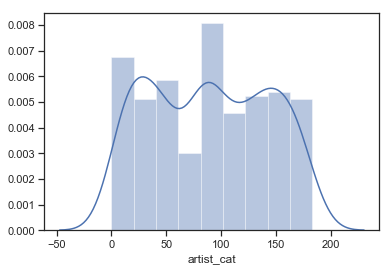

In [62]:
sns.distplot(data['artist_cat'])

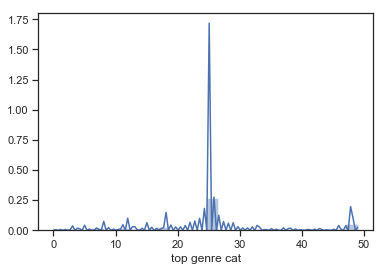

In [63]:
sns.distplot(data['top genre cat'])

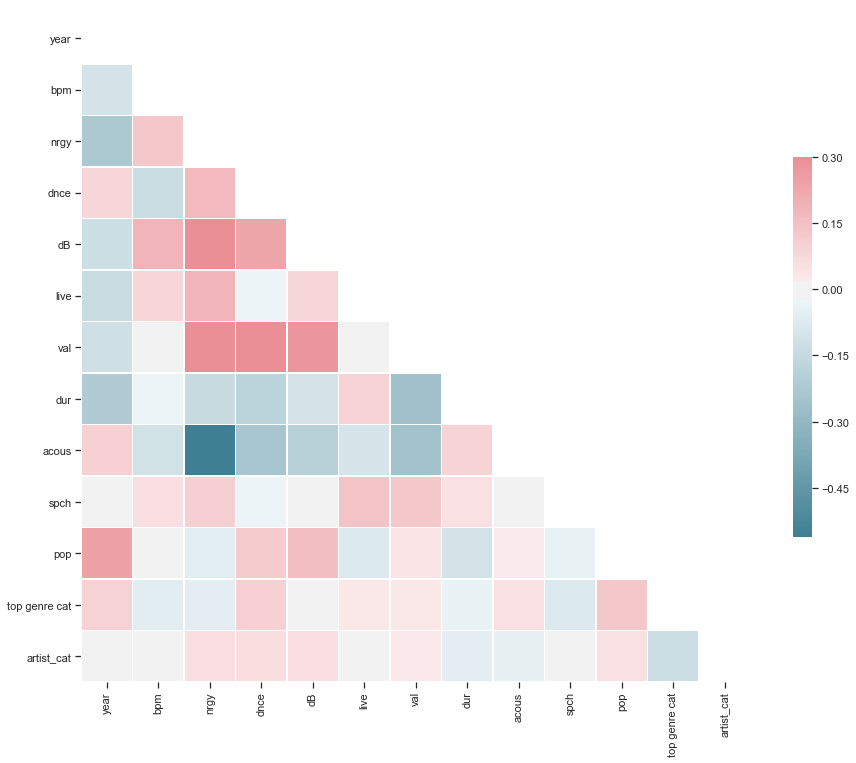

In [64]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})



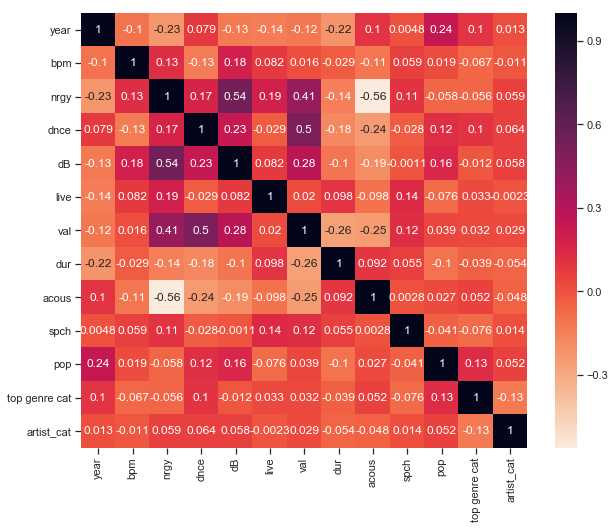

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True,cmap = sns.cm.rocket_r)

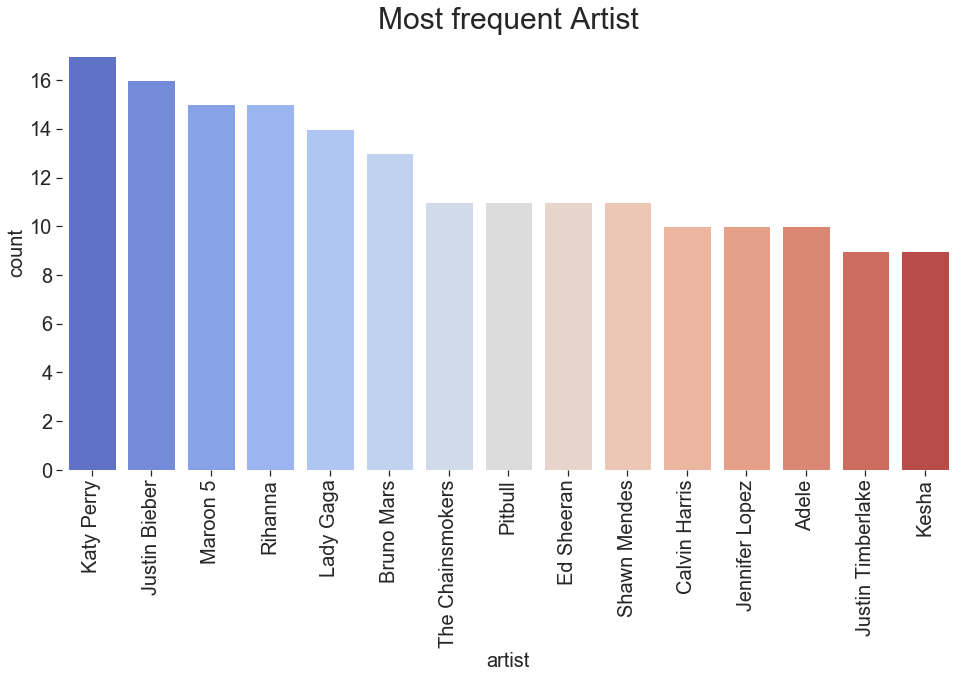

In [66]:
plt.figure(figsize=(16,8))
plt.title('Most frequent Artist',fontsize=30)
plt.xlabel('Artist', fontsize=20)
plt.ylabel('Count', fontsize=20)

sns.countplot(data.artist,order=pd.value_counts(data.artist).iloc[:15].index,palette=sns.color_palette("coolwarm", 15))

plt.xticks(size=20,rotation=90)
plt.yticks(size=20)
sns.despine(bottom=True, left=True)
plt.show()

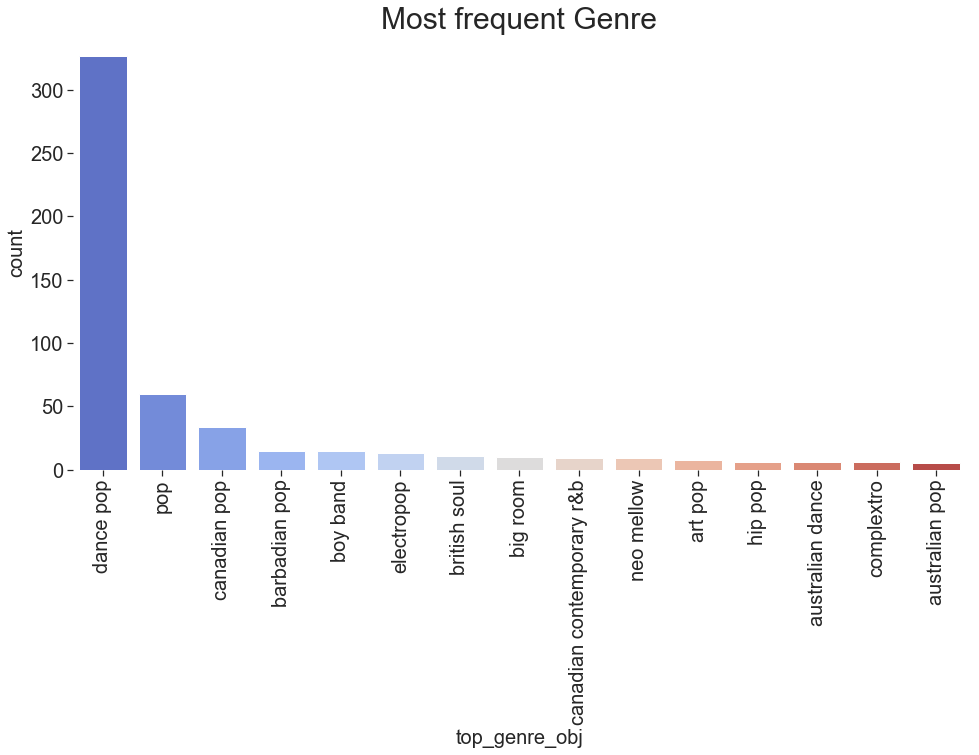

In [67]:
plt.figure(figsize=(16,8))
plt.title('Most frequent Genre',fontsize=30)
plt.xlabel('top genre', fontsize=20)
plt.ylabel('Count', fontsize=20)

sns.countplot(data.top_genre_obj,order=pd.value_counts(data.top_genre_obj).iloc[:15].index,palette=sns.color_palette("coolwarm", 15))

plt.xticks(size=20,rotation=90)
plt.yticks(size=20)
sns.despine(bottom=True, left=True)
plt.show()

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


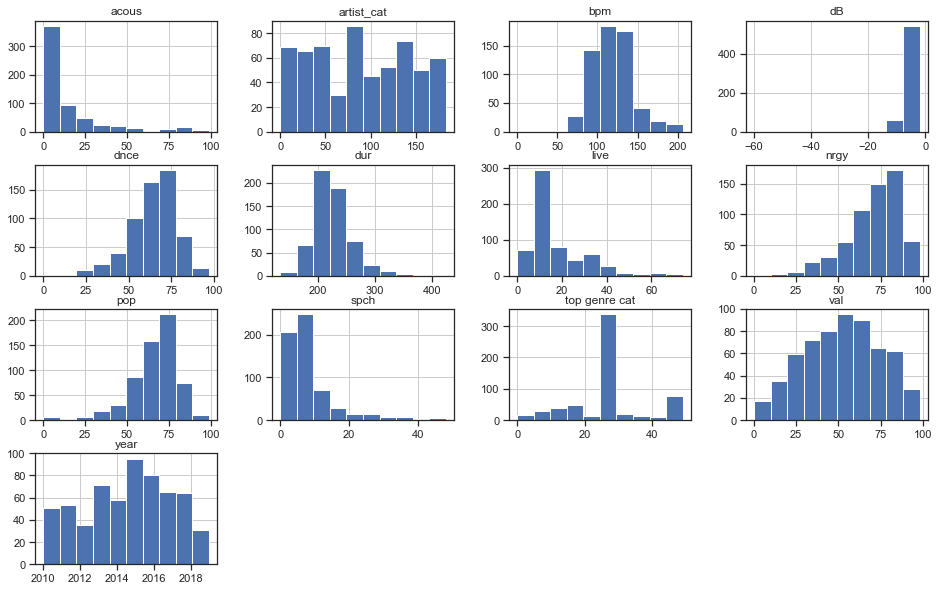

In [68]:
fig = plt.figure(figsize = (16,10))
ax = fig.gca()
data.hist(ax = ax)
plt.style.use('ggplot')

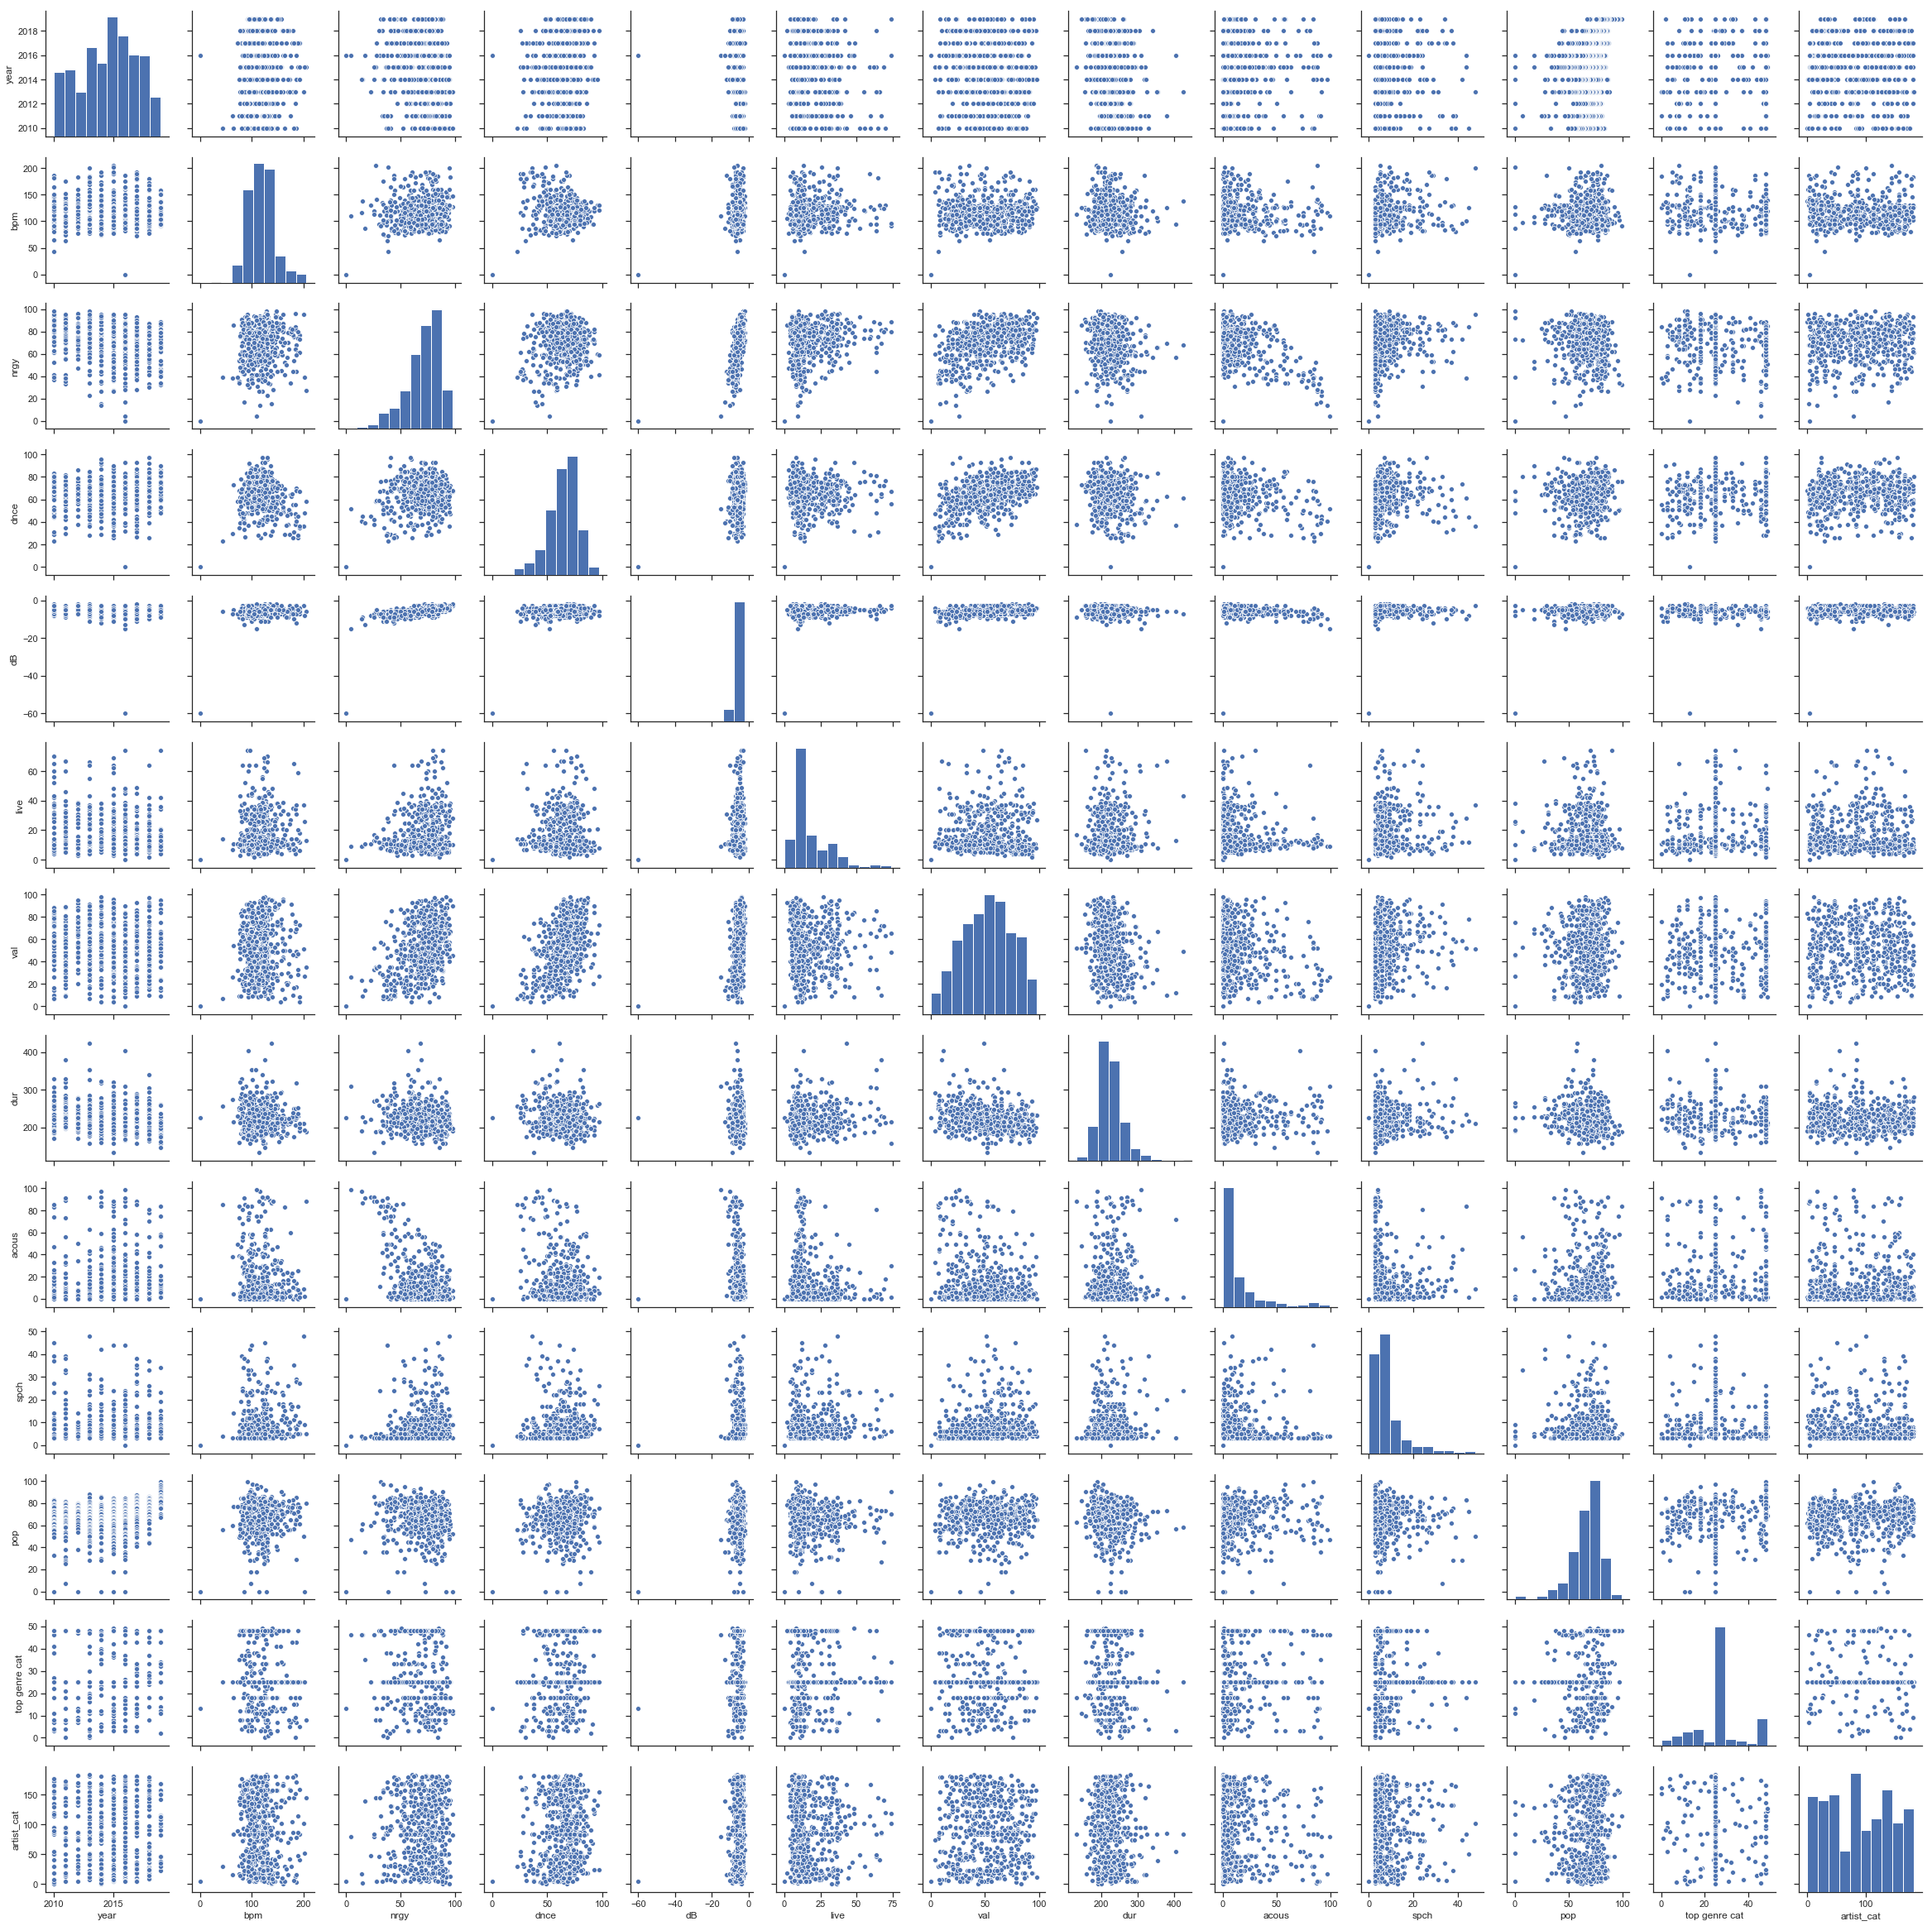

In [69]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)

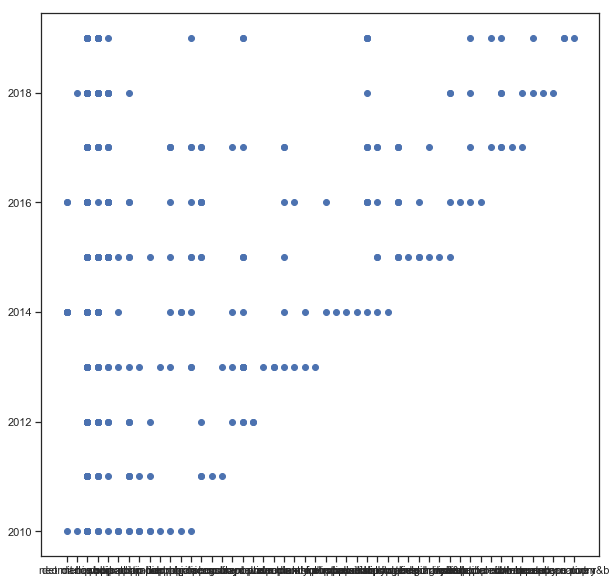

In [70]:
plt.figure(figsize=(10,10))
plt.scatter(data['top_genre_obj'], data['year'])

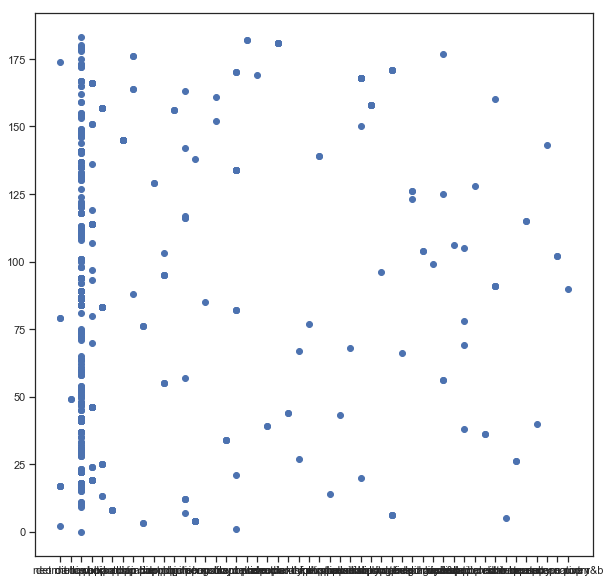

In [71]:
plt.figure(figsize=(10,10))
plt.scatter(data['top_genre_obj'], data['artist_cat'])

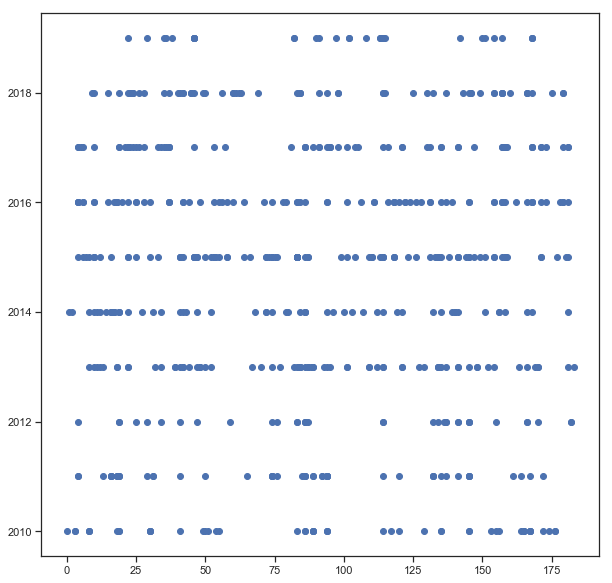

In [72]:
plt.figure(figsize=(10,10))
plt.scatter(data['artist_cat'], data['year'])

# Clustering

In [73]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 17 columns):
title            603 non-null object
artist           603 non-null category
top genre        603 non-null object
year             603 non-null int64
bpm              603 non-null int64
nrgy             603 non-null int64
dnce             603 non-null int64
dB               603 non-null int64
live             603 non-null int64
val              603 non-null int64
dur              603 non-null int64
acous            603 non-null int64
spch             603 non-null int64
pop              603 non-null int64
top_genre_obj    603 non-null category
top genre cat    603 non-null int8
artist_cat       603 non-null int16
dtypes: category(2), int16(1), int64(11), int8(1), object(2)
memory usage: 74.2+ KB
None


In [78]:
col = ['year', 'bpm','nrgy', 'dnce','dB', 'live','val','dur','acous','spch','pop','top genre cat', 'artist_cat']
X = data[col].astype('int64')
X.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre cat,artist_cat
0,2010,97,89,67,-4,8,80,217,19,4,83,46,174
1,2010,87,93,75,-5,52,64,263,24,23,82,27,49
2,2010,120,84,76,-3,29,71,200,10,14,80,25,89
3,2010,119,92,70,-4,8,71,295,0,4,79,25,94
4,2010,109,84,64,-5,9,43,221,2,4,78,48,19


In [77]:
k_means = KMeans(n_clusters=5)
pred_label = k_means.fit_predict(X)
pred_label

array([0, 3, 2, 3, 1, 2, 0, 0, 4, 0, 1, 1, 2, 2, 1, 0, 0, 0, 3, 2, 0, 1,
       2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 4, 1, 0, 3, 1, 3, 0, 0,
       4, 1, 0, 0, 0, 0, 2, 3, 4, 0, 1, 1, 1, 2, 1, 1, 2, 1, 3, 3, 1, 1,
       3, 2, 2, 0, 0, 3, 0, 1, 1, 2, 3, 2, 1, 1, 2, 3, 2, 1, 2, 0, 3, 4,
       1, 2, 2, 0, 0, 0, 4, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 3, 2, 2, 0,
       1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2,
       0, 2, 1, 2, 1, 0, 2, 1, 3, 1, 0, 2, 0, 3, 0, 2, 0, 1, 3, 0, 2, 1,
       2, 2, 1, 2, 0, 1, 3, 3, 1, 1, 4, 3, 3, 0, 2, 0, 4, 1, 3, 2, 3, 1,
       2, 2, 2, 2, 1, 3, 1, 0, 0, 4, 0, 3, 4, 0, 1, 0, 2, 0, 2, 1, 2, 1,
       0, 1, 1, 2, 2, 1, 3, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 0, 3,
       2, 2, 0, 1, 1, 0, 1, 4, 3, 0, 0, 1, 0, 4, 3, 0, 1, 0, 4, 4, 2, 2,
       2, 1, 2, 3, 3, 0, 0, 4, 2, 4, 2, 2, 0, 3, 0, 2, 0, 2, 1, 2, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 0, 1, 3, 2, 1, 0, 1, 1,

In [84]:
data['cluster'] = pred_label
data.sample(10)

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top_genre_obj,top genre cat,artist_cat,cluster
582,Higher Love,Kygo,edm,2019,104,68,69,-7,10,40,228,2,3,88,edm,29,91,2
570,Drip (feat. Migos),Cardi B,pop,2018,130,59,97,-8,8,27,264,5,26,45,pop,48,24,3
509,Havana (feat. Young Thug),Camila Cabello,dance pop,2018,105,52,77,-4,13,39,217,18,3,85,dance pop,25,23,1
192,Atlas - From The Hunger Games: Catching Fire...,Coldplay,permanent wave,2013,136,45,28,-8,11,11,236,63,3,55,permanent wave,47,34,4
22,Take It Off,Kesha,dance pop,2010,125,68,73,-5,9,74,215,0,3,66,dance pop,25,89,2
163,Work Bitch,Britney Spears,dance pop,2013,128,82,63,-7,7,85,248,16,16,71,dance pop,25,18,1
210,All of Me,John Legend,neo mellow,2014,120,26,42,-7,13,33,270,92,3,86,neo mellow,46,79,4
399,Just Like Fire (From the Original Motion Pictu...,P!nk,dance pop,2016,163,70,63,-6,11,50,215,1,15,71,dance pop,25,137,0
57,Moves Like Jagger - Studio Recording From The ...,Maroon 5,pop,2011,128,76,72,-4,32,62,201,1,5,76,pop,48,114,2
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,detroit hip hop,27,49,3
